# Entrainement d'un modèle

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Lasso, Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor

In [3]:
data_hotel = pd.read_csv("clean_data.csv")
data_hotel.head()

,lead_time,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,nb_persons,nb_nights,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,1.609764,0.839446,-0.161398,-1.125010,-0.794241,0.100908,0.008417,-0.060132,-0.100847,-0.242851,1.568506,-1.338085,1.0
1,-0.937707,1.166097,-0.161398,0.117871,0.442749,0.100908,1.190305,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,1.0
2,-0.984236,-1.773767,-0.161398,-1.274108,-0.794241,-1.492329,0.008417,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,0.0
3,1.458545,-0.793812,-0.161398,-0.081324,-0.794241,0.100908,-0.582528,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,0.0
4,-0.437518,-1.120464,-0.161398,-0.245332,-0.794241,0.100908,-0.582528,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,0.0


In [4]:
X = data_hotel.drop(['booking_status_Not_Canceled'], axis=1)
y = data_hotel['booking_status_Not_Canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Perceptron

In [4]:
perceptron = Perceptron()
#Entraînement
perceptron.fit(X_train, y_train)
y_pred=perceptron.predict(X_test)

#Test
print("Accuracy : ", perceptron.score(X_test, y_test))
print("Precision : ", precision_score(y_test, y_pred))
print("Rappel : ", recall_score(y_test, y_pred))

Accuracy :  0.6988215488215488
Precision :  0.8008241758241759
Rappel :  0.7325961296808243


## MLPClassifier

In [5]:
ann = MLPClassifier(max_iter=300)
#Entraînement
ann.fit(X_train, y_train)
y_pred=ann.predict(X_test)

#Test
print("Accuracy : ", ann.score(X_test, y_test))
print("Precision : ", precision_score(y_test, y_pred))
print("Rappel : ", recall_score(y_test, y_pred))

Accuracy :  0.8471380471380472
Precision :  0.8538833832680341
Rappel :  0.9311384770042724


C:\Users\llesage2025\PycharmProjects\projet_ia_python\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


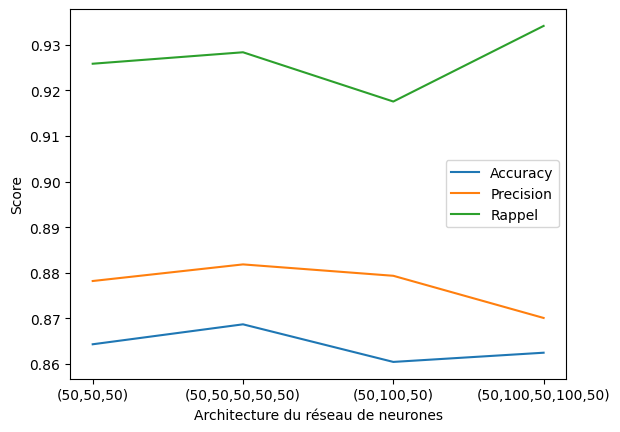

Architecture optimale :  (50, 50, 50, 50, 50)
Accuracy de l'architecture (50, 50, 50, 50, 50) :  0.8686868686868687
Précision de l'architecture (50, 50, 50, 50, 50) :  0.8818333731200764
Rappel de l'architecture (50, 50, 50, 50, 50) :  0.9283739633073637


In [6]:
architectures = [(50,50,50),(50,50,50,50,50),(50,100,50),(50,100,50,100,50),]
labels = ['(50,50,50)','(50,50,50,50,50)','(50,100,50)','(50,100,50,100,50)']

accuracies = []
precisions = []
recalls = []

for archi in architectures:
    ann = MLPClassifier(max_iter=500, hidden_layer_sizes=archi)
    ann.fit(X_train, y_train)
    y_pred = ann.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

plt.plot(labels, accuracies, label='Accuracy')
plt.plot(labels, precisions, label='Precision')
plt.plot(labels, recalls, label='Rappel')
plt.xticks(labels)
plt.xlabel('Architecture du réseau de neurones')
plt.ylabel('Score')
plt.legend()
plt.show()

pos_meilleure_archi = np.argmax(accuracies)
meilleure_archi = architectures[pos_meilleure_archi]
print("Architecture optimale : ", meilleure_archi)
print("Accuracy de l'architecture", meilleure_archi, ": ", accuracies[pos_meilleure_archi])
print("Précision de l'architecture", meilleure_archi, ": ", precisions[pos_meilleure_archi])
print("Rappel de l'architecture", meilleure_archi, ": ", recalls[pos_meilleure_archi])

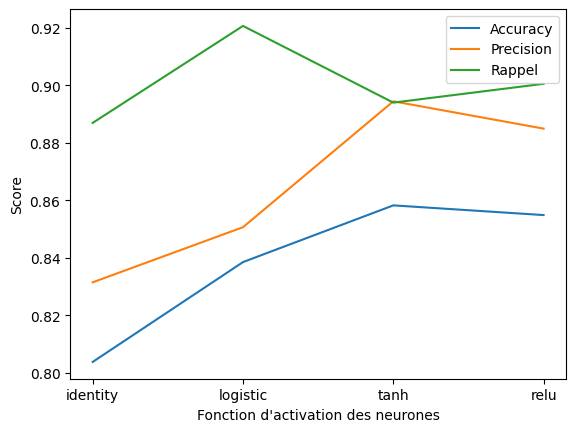

Fonction d'activation optimale :  tanh
Accuracy de la fonction tanh :  0.8582491582491583
Précision de la fonction tanh :  0.8943927583605733
Rappel de la fonction tanh :  0.8939432018094998


In [7]:
activations = ['identity', 'logistic', 'tanh', 'relu']

accuracies = []
precisions = []
recalls = []

for f in activations:
    ann = MLPClassifier(hidden_layer_sizes=meilleure_archi,max_iter=1000, activation=f)
    ann.fit(X_train, y_train)
    y_pred = ann.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

plt.plot(activations, accuracies, label='Accuracy')
plt.plot(activations, precisions, label='Precision')
plt.plot(activations, recalls, label='Rappel')
plt.xticks(activations)
plt.xlabel('Fonction d\'activation des neurones')
plt.ylabel('Score')
plt.legend()
plt.show()

pos_meilleure_fun = np.argmax(accuracies)
meilleure_fun = activations[pos_meilleure_fun]
print("Fonction d'activation optimale : ", meilleure_fun)
print("Accuracy de la fonction", meilleure_fun, ": ", accuracies[pos_meilleure_fun])
print("Précision de la fonction", meilleure_fun, ": ", precisions[pos_meilleure_fun])
print("Rappel de la fonction", meilleure_fun, ": ", recalls[pos_meilleure_fun])

# sauvegarde des scores
ann_best_accuracy = accuracies[pos_meilleure_fun]
ann_best_pred = precisions[pos_meilleure_fun]
ann_best_recall = recalls[pos_meilleure_fun]

In [8]:
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Annulé', 'Non Annulé'])
# disp.plot(cmap='Blues')
# print("Meilleur accuracy: ", round(dt_best_accuracy, 4))
# print("Meilleure précision :", round(dt_best_pred,4))
# print("Meilleur rappel: ", round(dt_best_accuracy,4))

# Tests des différents archi


In [14]:
parameters = {
    "hidden_layer_sizes": [(50,50,50),(50,50,50,50,50),(50,100,50),(50,100,50,100,50),],
    "activation": ['identity', 'logistic', 'tanh', 'relu']
}

ann = MLPClassifier(max_iter=750)

ann = GridSearchCV(
    ann,
    parameters,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
)

ann.fit(X_train, y_train)

print('-----')
print(f'Meilleurs paramètres {ann.best_params_}')
print(
    f'Score moyen de validation croisée pour la meilleure combinaison de paramètres: ' +
    f'{ann.best_score_:.3f}'
)

-----
Meilleurs paramètres {'activation': 'relu', 'hidden_layer_sizes': (50, 100, 50, 100, 50)}
Score moyen de validation croisée pour la meilleure combinaison de paramètres: 0.863


In [12]:
# Définition des hyperparamètres


-----
Meilleurs paramètres: {'hidden_layer_sizes': (50, 50, 50, 50, 50), 'activation': 'relu'}
Score moyen de validation croisée pour la meilleure combinaison de paramètres: 0.864


[0.8664983164983165, 0.8582491582491583, 0.8609427609427609, 0.8599326599326599, 0.8702020202020202, 0.8641414141414141, 0.8634680134680135, 0.8614478114478115, 0.867003367003367, 0.8594276094276094]
[0.8920358266763495, 0.8928571428571429, 0.8950221784130113, 0.8968253968253969, 0.90169992609017, 0.8840200047630388, 0.8917538311846266, 0.9004242575492888, 0.8824917413874469, 0.8936222605269638]
[0.9139384920634921, 0.8990575396825397, 0.9007936507936508, 0.8968253968253969, 0.9077380952380952, 0.9206349206349206, 0.9092261904761905, 0.8948412698412699, 0.9275793650793651, 0.9000496031746031]


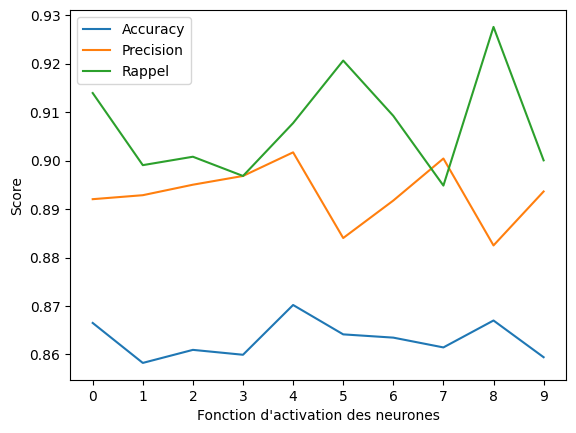

In [8]:
from concurrent.futures import ThreadPoolExecutor

accuracies = []
precisions = []
recalls = []

custom_range = range(0,10)

def train_and_evaluate(i):
    ann = MLPClassifier(hidden_layer_sizes=(50,100,50,100,50,100,50,100,50),
                        max_iter=1000,
                        activation="relu")
    ann.fit(X_train, y_train)
    y_pred = ann.predict(X_test)

    return (
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred)
    )

with ThreadPoolExecutor(max_workers=5) as executor:
    results = executor.map(train_and_evaluate, custom_range)

for acc, prec, rec in results:
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)

print(accuracies)
print(precisions)
print(recalls)

plt.plot(custom_range, accuracies, label='Accuracy')
plt.plot(custom_range, precisions, label='Precision')
plt.plot(custom_range, recalls, label='Rappel')
plt.xticks(custom_range)
plt.xlabel('Fonction d\'activation des neurones')
plt.ylabel('Score')
plt.legend()
plt.show()